# **Tarea 4: Separeación por tamaño cromatografía**
Andrea Jalil García

**a) Utilizando los datos entregados, grafique H(mm) v/s u(cm/s) para cada tamaño de partícula y discuta qué columna ofrece mejor eficiencia en ese rango**
- Importación de librerias

In [35]:
import math as mat
import numpy as np
from scipy.optimize import curve_fit
from tabulate import tabulate
import matplotlib.pyplot as plt

- Definición de vectores con datos experimentales
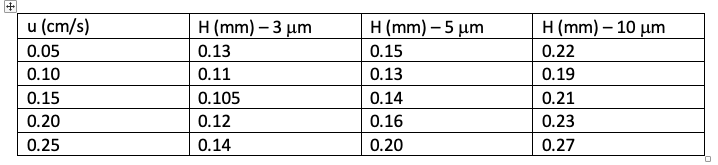
- Definición de la función `van_deemter` y sus parámetros `A`,`B`,`C` y `u` (velocidad límite)

In [36]:
u = np.array([0.05, 0.10, 0.15, 0.20, 0.25])
H_3 = np.array([0.13, 0.11, 0.105, 0.12, 0.14])  #3 µm
H_5 = np.array([0.15, 0.13, 0.14, 0.16, 0.20])   #5 µm
H_10 = np.array([0.22, 0.19, 0.21, 0.23, 0.27])  #10 µm

def van_deemter(u, A, B, C): #Definición de la función
    return A + B/u + C*u

- Ajuste de curvas para cada conjunto de datos
- Creación de rango fijo de velocidades para graficar curva ajustada

In [37]:
params_3, _ = curve_fit(van_deemter, u, H_3)
params_5, _ = curve_fit(van_deemter, u, H_5)
params_10, _ = curve_fit(van_deemter, u, H_10)

# Rango velocidades
u_fine = np.linspace(0.03, 0.27, 300)
H_fit_3 = van_deemter(u_fine, *params_3)
H_fit_5 = van_deemter(u_fine, *params_5)
H_fit_10 = van_deemter(u_fine, *params_10)


- Creación de gráficos para comparar las 3 columnas distintas

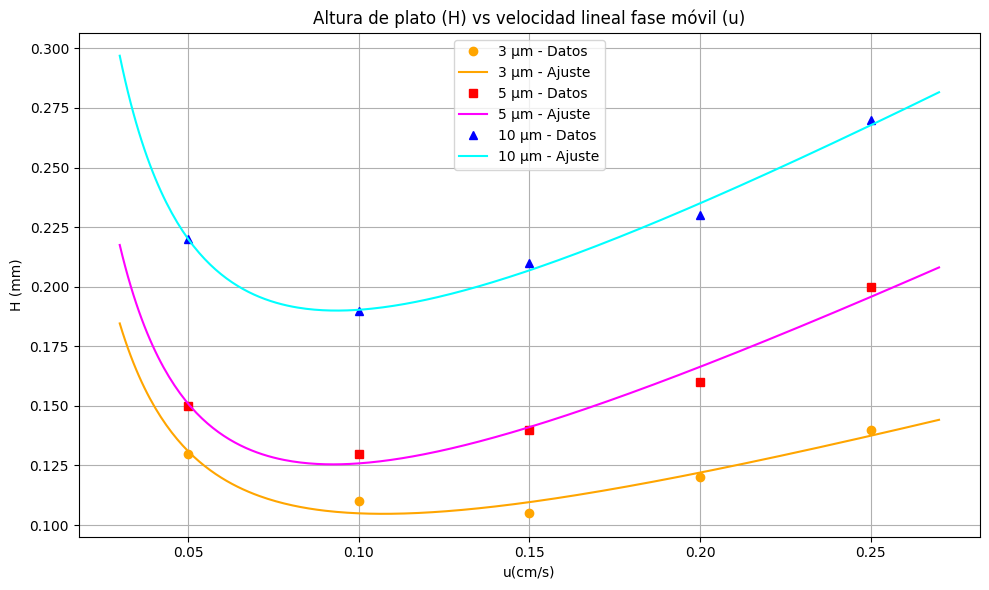

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(u, H_3, 'o', label='3 µm - Datos', color='orange')
plt.plot(u_fine, H_fit_3, '-', label='3 µm - Ajuste', color='orange')

plt.plot(u, H_5, 's', label='5 µm - Datos', color='red')
plt.plot(u_fine, H_fit_5, '-', label='5 µm - Ajuste', color='magenta')

plt.plot(u, H_10, '^', label='10 µm - Datos', color='blue')
plt.plot(u_fine, H_fit_10, '-', label='10 µm - Ajuste', color='cyan')

plt.xlabel('u(cm/s)')
plt.ylabel('H (mm)')
plt.title('Altura de plato (H) vs velocidad lineal fase móvil (u)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Se puede observar del gráfico que:
1.  La eficiencia disminuye al aumentar el tamaño de la particula.
2. Menor valor de H implica mayor eficiencia, es decir la **columna** cromatografica con **altura de plato de 3 µm**, este es el menor valor de H, implica mayor eficiencia en el rango evaluado

**b) Comente a qué se debe que esos tamaños de particula consigan mayor eficiencia y que desventaja tiene utilizar estos tipos de diámetro de partícula**

La eficiencia de una columna cromatográfica se cuantifica mediante la altura de plato teórico ($H$). Cuanto menor sea $H$, mayor será la eficiencia de la separación. Mayor eficiencia con partículas más pequeñas se debe principalmente a:
- **Menor camino de difusión**, las partículas más pequeñas se empaquetan de forma más uniforme, es decir, disminuyen los caminos alternativos que las partículas pueden tomar, lo cual se traduce en una menor dispersión del flujo. Como resultado a esta menor dispersión existe una menor contribución de A y menor variabilidad en los tiempos de retención.

- **Menor contribución del término C** de la ecuación de Van Deemter (resistencia a la transferencia de masa). La fase estacionaria más fina significa una distancia de difusión más corta para los solutos dentro de las partículas, en otras palabras, Se mejora la velocidad de transferencia de masa entre fase móvil y fase estacionaria. Como resultado de lo anterior se pueden usar velocidades más altas sin perder tanta eficiencia
- **Mejor resolución y capacidad de análisis rápido**, permiten mejores separaciones de picos cromatográficos cercanos y es posible realizar análisis más rápidos sin sacrificar resolución.

Desventajas de usar partículas pequeñas:
- **Mayor caída de presión $(∆P)$a través de la columna**. Esto dado que la caída de presión es inversamente proporcional al cuadrado del diámetro de partícula. Es decir para partículas de menor diámetro *(3 µm)* requieren presiones mucho mayores para mantener el mismo flujo que partículas de mayor diámetro *(5 µm o 10 µm)*. Esto implica la necesidad de **equipos más robustos y costosos**, como sistemas HPLC de ultra alta presión (UHPLC).

- Posible reducción en la vida útil del equipo (generalmente las columnas más pequeñas tienen una vida útil menor)

- Posibles **problemas de empaquetamiento y atasco**, requieren mayor precisión en el empaquetado de la columna y son más susceptibles a obstrucción por partículas finas o contaminantes.

**c) A partir de los datos experimentales, ajusta la ecuación de Van Deemter a los datos de cada columna. Utilice algun software para estimar los coeficientes A,B y C.**

La lista `params_i`contiene los valores ajustados de los coeficientes A, B y C de la ecuación de Van Deemter para la columna que utiliza partículas de i µm de diámetro. Esta lista se obtiene mediante la función `curve_fit()` de la librería `scipy.optimize`, la cual realiza un ajuste no lineal por mínimos cuadrados a los datos experimentales.

In [42]:
# Obtención coef
print("Estimación coeficientes columna 3 µm:\nA: {}\nB: {}\nC: {}".format(params_3[0], params_3[1], params_3[2]))
print("------------------------------------------")
print("Estimación coeficientes columna 5 µm:\nA: {}\nB: {}\nC: {}".format(params_5[0], params_5[1], params_5[2]))
print("------------------------------------------")
print("Estimación coeficientes columna 10 µm:\nA: {}\nB: {}\nC: {}".format(params_10[0], params_10[1], params_10[2]))

Estimación coeficientes columna 3 µm:
A: 0.018516427384042158
B: 0.004620275421658257
C: 0.4019003807883007
------------------------------------------
Estimación coeficientes columna 5 µm:
A: -0.005429196129848057
B: 0.006050866292370099
C: 0.7077641136122786
------------------------------------------
Estimación coeficientes columna 10 µm:
A: 0.04134581278926595
B: 0.006951607273324017
C: 0.7944189384677102


**Observación:** El valor negativo de A para 5 µm probablemente indica ligero sobreajuste o dispersión en los datos. En la práctica, A debería ser positivo

**d) A partir de los parámetros obtenidos, calcular el valor de velocidad óptima $u_{optima}$**

Es la velocidad $u$ a la que $H(u)$ es **mínima**, es decir, donde la columna es más eficiente. Para encontrarla, derivamos $H(u)$ con respecto a $u$ e igualamos a cero:
$$\frac{dH}{du}=-\frac{B}{u^2}+C=0 $$
Resolviendo tenemos que:
$$\frac{B}{u^2}=C  \Rightarrow u^2= \frac{B}{C} \Rightarrow u_{optima}=\sqrt{\frac{B}{C}}$$
- El término A no depende de $u$, por eso no afecta la velocidad óptima.
- El valor óptimo de $u$ es el punto donde los efectos de difusión y transferencia de masa se equilibran
- Interpretación práctica:
  - Si B es grande (alta difusión): el sistema prefiere velocidades mayores.
  - Si C es grande (alta resistencia a transferencia de masa): se requiere una velocidad menor para optimizar.

In [43]:
# Velocidad optima u (cm/s)
u_optima_3 = mat.sqrt((params_3[1]/params_3[2]))
u_optima_5 = mat.sqrt((params_5[1]/params_5[2]))
u_optima_10 = mat.sqrt((params_10[1]/params_10[2]))
# Tabla
tabla = [
    ["3 µm", u_optima_3],
    ["5 µm", u_optima_5],
    ["10 µm", u_optima_10]]
print(tabulate(tabla, headers=["Columna", "Velocidad Óptima (cm/s)"], floatfmt=".4f"))

Columna      Velocidad Óptima (cm/s)
---------  -------------------------
3 µm                          0.1072
5 µm                          0.0925
10 µm                         0.0935
